In [1]:
import copy
import random
import itertools
import numpy as np

from matplotlib import pyplot

In [78]:
class SortingNetwork():
    comparators = []
    seen = set()

    def objective(self, comps):
        is_network = self.is_sorting_network(comps)
        if is_network:
            return len(comps)
        else:
            return len(self.comparators) + len(comps)

    def genPair(self, m, n):
        tmp = []
        for i in range(m, n):
            for j in range(m, n):
                if i == j:
                    continue
                tmp.append((i, j))
        return tmp

    def __init__(self, arr) -> None:
        self.comparators = self.genPair(0, len(arr))
        self.arr = arr

    def is_sorting_network(self, network):
        permutations = list(itertools.permutations(self.arr))
        if len(network) == 0:
            return False
        for perm in permutations:
            arr = self.sort(network, list(perm))
            if arr != sorted(self.arr):
                return False
        return True

    def sort(self, comps, arr=None):
        if comps is None:
            comps = self.comparators
        if arr is None:
            arr = copy.deepcopy(self.arr)
        for x, y in comps:
            if x > y and arr[x] < arr[y]:
                arr[x], arr[y] = arr[y], arr[x]
            if x < y and arr[x] > arr[y]:
                arr[x], arr[y] = arr[y], arr[x]
        return arr

    def simulated_annealing(self, n_iterations, temp, mutation_prob):
        best = self.comparators
        best_eval = len(best)
        curr, curr_eval = copy.deepcopy(self.comparators), best_eval
        scores = [best_eval]
        best_scores = [best_eval]
        temps = []
        for i in range(n_iterations):
            if len(curr) == 1:
                curr = best
            selection = random.randint(0, len(curr)-1)
            candidate = copy.deepcopy(curr)
            candidate.pop(selection)
            if random.random() < mutation_prob:
                if random.random() > 0.01:
                    if len(curr) < len(self.comparators) - 1:
                        num_1 = np.random.randint(0, len(self.arr))
                        num_2 = np.random.randint(0, len(self.arr))
                        while num_1 == num_2:
                            num_2 = np.random.randint(0, len(self.arr))
                        pos = np.random.randint(0, len(curr))
                        candidate.insert(pos, (num_1, num_2))
                else:
                    pos = np.random.randint(0, len(curr))
                    candidate.pop(pos)
            # is_network = self.is_sorting_network(candidate)
            # print(f"{curr} {is_network}")
            candidate_eval = self.objective(candidate)
            curr_eval = self.objective(curr)
            # print(f"{candidate_eval} < {best_eval} {is_network}")
            if candidate_eval < best_eval:# and is_network:
                print(f'new best {candidate_eval}')
                best, best_eval = candidate, candidate_eval
            diff = candidate_eval - curr_eval
            t = temp / float(i + 1)
            metropolis = np.exp(-diff / t)
            curr = best
            if diff > 0 and random.randint(0, temp) < metropolis:
                # store the new current point
                curr, curr_eval = candidate, candidate_eval
            temps.append(t)
            best_scores.append(best_eval)
            scores.append(candidate_eval)
        return [best, best_eval, scores, temps, best_scores]

Is sorting network? True
[0, 1, 2, 3, 4, 5, 6, 7]
new best 55
new best 54
new best 53
new best 52
new best 51
new best 50
new best 49
new best 48
new best 47
new best 46
new best 45
new best 44
new best 43
new best 42
new best 41
new best 40
new best 39
new best 38
new best 37
new best 36
Is sorting network? True
[0, 1, 2, 3, 4, 5, 6, 7]


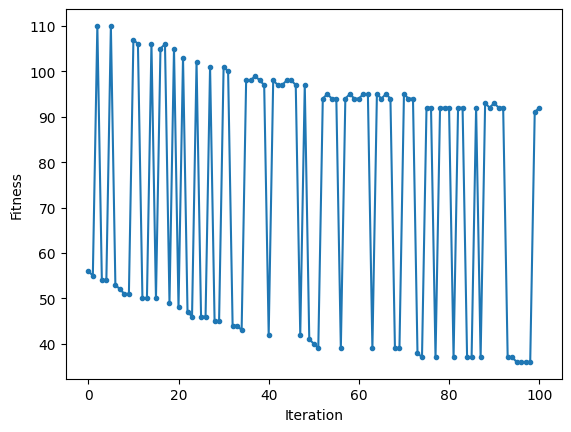

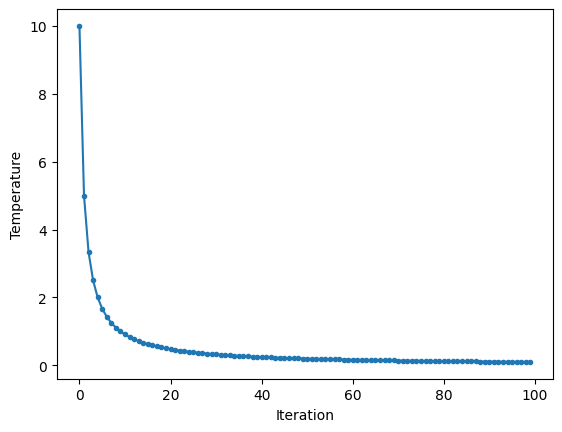

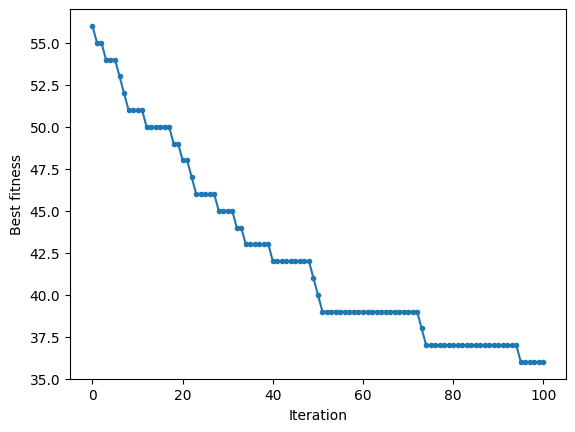

In [79]:
arr = [7,6,5,4,3,2,1,0]
network = SortingNetwork(arr)
print(f"Is sorting network? {network.is_sorting_network(network.comparators)}")

arr = network.sort(None)
print(arr)
best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5)
# print(best)
print(f"Is sorting network? {network.is_sorting_network(best)}")
print(network.sort(best))

pyplot.plot(scores, '.-')
pyplot.xlabel('Iteration')
pyplot.ylabel('Fitness')
pyplot.show()

pyplot.figure()
pyplot.plot(temps, '.-')
pyplot.xlabel('Iteration')
pyplot.ylabel('Temperature')
pyplot.show()

pyplot.figure()
pyplot.plot(best_scores, '.-')
pyplot.xlabel('Iteration')
pyplot.ylabel('Best fitness')
pyplot.show()